{'train/label': <tf.Tensor 'ParseSingleExample_8/ParseSingleExample:1' shape=() dtype=int64>, 'train/image': <tf.Tensor 'ParseSingleExample_8/ParseSingleExample:0' shape=() dtype=string>}
<class 'tensorflow.python.framework.ops.Tensor'>
features Tensor("ParseSingleExample_8/ParseSingleExample:1", shape=(), dtype=int64)
<class 'tensorflow.python.framework.ops.Tensor'>
image type <class 'tensorflow.python.framework.ops.Tensor'>


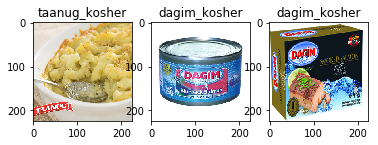

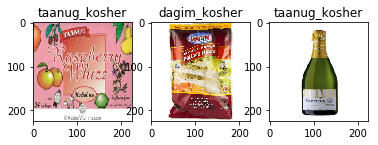

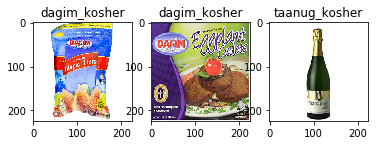

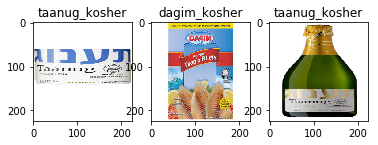

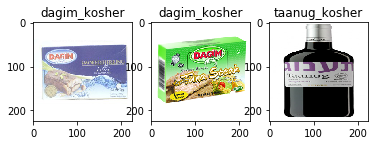

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_path = 'train.tfrecords'  # address to save the hdf5 file
with tf.Session() as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
    
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    print(features)
    
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    print(type(image))
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    print("features" ,features['train/label'])
    print(type(label))
    
    # Reshape image data into the original shape
    image = tf.reshape(image, [224, 224, 3])
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors
    images, labels = tf.train.shuffle_batch([image, label], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
    print("image type", type(images))
    
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(5):
        img, lbl = sess.run([images, labels])
        # print(str(img.shape), str(lbl.shape), str(type(img)), str(type(lbl)))
        img = img.astype(np.uint8)
        for j in range(3):
            plt.subplot(2, 3, j+1)
            plt.imshow(img[j, ...])
            plt.title('dagim_kosher' if lbl[j]==0 else 'taanug_kosher')
        plt.show()
        
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

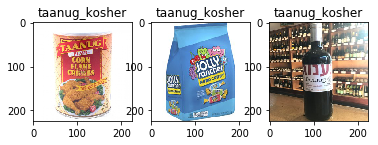

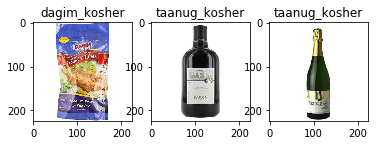

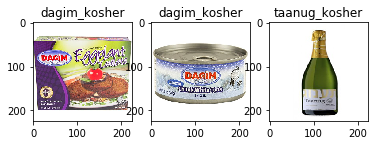

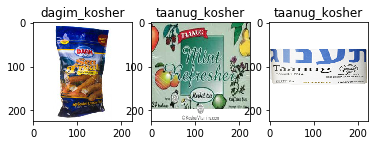

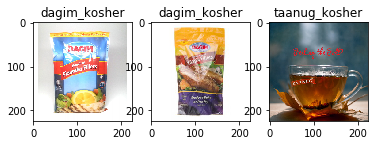

In [4]:
with tf.Session() as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
    
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    
    # Reshape image data into the original shape
    image = tf.reshape(image, [224, 224, 3])
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors
    images, labels = tf.train.shuffle_batch([image, label], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
    
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(5):
        img, lbl = sess.run([images, labels])
        # print(str(img.shape), str(lbl.shape), str(type(img)), str(type(lbl)))
        img = img.astype(np.uint8)
        for j in range(3):
            plt.subplot(2, 3, j+1)
            plt.imshow(img[j, ...])
            plt.title('dagim_kosher' if lbl[j]==0 else 'taanug_kosher')
        plt.show()
        
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()